In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv('boston_house_prices.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.shape

(506, 14)

In [9]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
predictions=model.predict(X_test)
mse1=mean_squared_error(y_test,predictions)
r2_lr=r2_score(y_test,predictions)

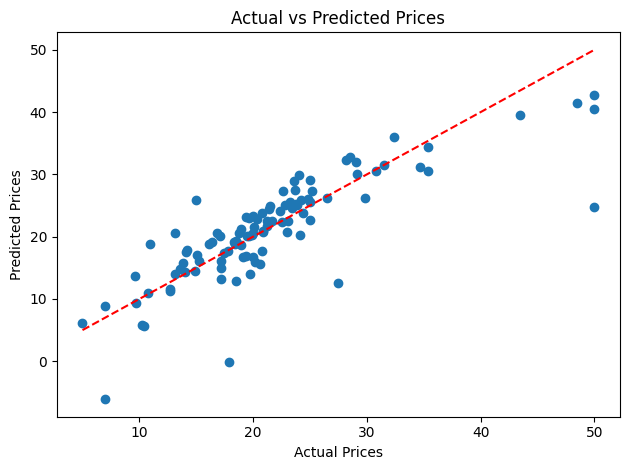

In [61]:
plt.scatter(y_test, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()


In [51]:
rf_model=RandomForestRegressor(n_estimators = 100, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [58]:
predict=rf_model.predict(X_test)

In [59]:
mse2=mean_squared_error(y_test,predict)
r2_rf=r2_score(y_test,predict)

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [50]:
pred=dt_model.predict(X_train)
mse3=mean_squared_error(y_train,pred)
r2_dt=r2_score(y_train,pred)

In [56]:
comparison=pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest'],'MSE':[mse1,mse2,mse3],'R squared':[r2_lr,r2_rf,r2_dt]})

In [60]:
comparison

,Model,MSE,R squared
0,Linear Regression,24.311427,0.668483
1,Decision Tree,7.821659,0.893342
2,Random Forest,0.000000,1.000000


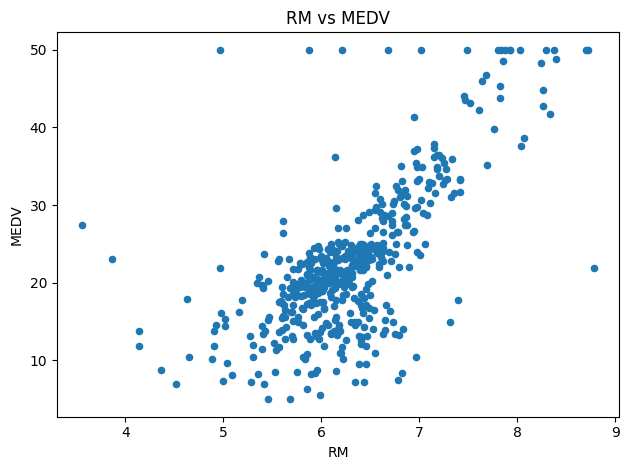

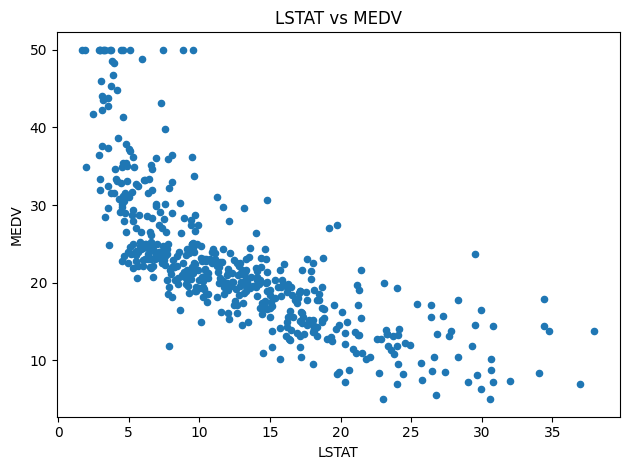

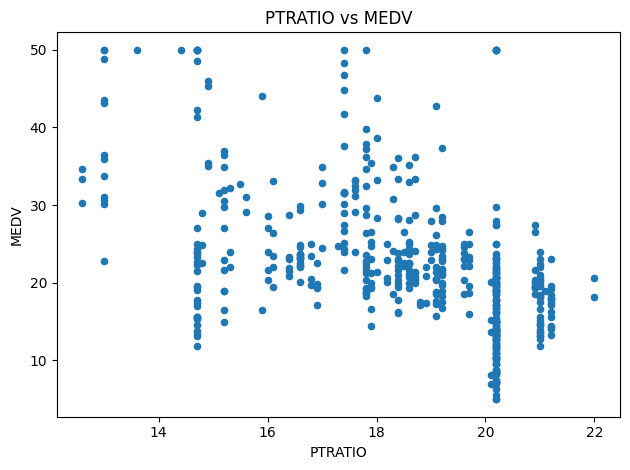

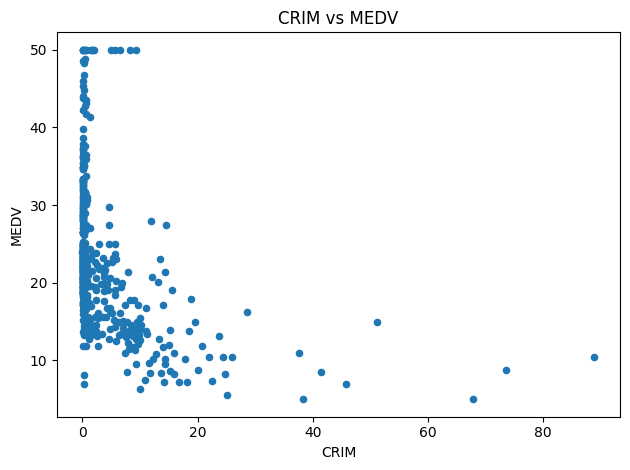

In [62]:
key_features = ["RM", "LSTAT", "PTRATIO", "CRIM"]
for feature in key_features:
    df.plot.scatter(x=feature, y="MEDV", title=f"{feature} vs MEDV")
    plt.tight_layout()
    plt.show()

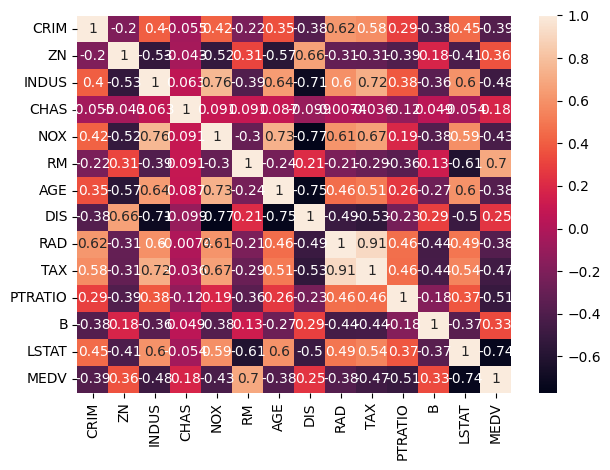

In [70]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.show()